In [69]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten,Dropout
import keras

In [70]:
import scipy.io as sio
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
normal=[]
normal_label=[]
#label for normal:0
for i in range(1,4):
  data=sio.loadmat("/content/drive/MyDrive/HRCT/normal/"+str(i)+".mat")
  data1=data["totalDataSource"].reshape(data["totalDataSource"].shape[2],16,16)
  for j in range(0,data1.shape[0]):
    normal.append(data1[j])  
    normal_label.append(0)

print("normal size is:",len(normal))
print("normal_label size is:",len(normal_label))

normal size is: 3617
normal_label size is: 3617


In [71]:
import scipy.io as sio
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
inflammation=[]
inflammation_label=[]
#label for inflammation:1
for i in range(1,21):
  data=sio.loadmat("/content/drive/MyDrive/HRCT/inflammation/"+str(i)+".mat")
  data1=data["totalDataSource"].reshape(data["totalDataSource"].shape[2],16,16)
  for j in range(0,data1.shape[0]):
    inflammation.append(data1[j])  
    inflammation_label.append(0)

print("inflammation size is:",len(inflammation))
print("inflammation_label size is:",len(inflammation_label))


inflammation size is: 408
inflammation_label size is: 408


In [72]:
import scipy.io as sio
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
bronch=[]
bronch_label=[]
#label for bronch:2
for i in range(1,14):
  data=sio.loadmat("/content/drive/MyDrive/HRCT/bronch/"+str(i)+".mat")
  data1=data["totalDataSource"].reshape(data["totalDataSource"].shape[2],16,16)
  for j in range(0,data1.shape[0]):
    bronch.append(data1[j])  
    bronch_label.append(2)

print("bronch size is:",len(bronch))
print("bronch_label size is:",len(bronch_label))

bronch size is: 3198
bronch_label size is: 3198


In [73]:

train=normal+inflammation+bronch

train_label=normal_label+inflammation_label+bronch_label

In [74]:
import numpy as np

train=np.asarray(train).reshape((len(train),16,16))


In [75]:
train=train.reshape((7223, 16, 16,1))

In [76]:
from sklearn.utils import shuffle
train , train_label = shuffle([np.array(train) , np.array(train_label)])




In [77]:
from keras.utils import np_utils
train_label=np_utils.to_categorical(train_label,3)


In [78]:
train_label


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [79]:

import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten,Dropout
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping



#Build Model
height = 16
width = 16
channels = 1
num_classes = 36

epochs = 79
checkpoint = ModelCheckpoint("adam_3.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=1, mode='auto')

model = keras.models.Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=train.shape[1:]))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


X_train,X_valid,Y_train,Y_valid = train_test_split(train,train_label,test_size = 0.3,random_state=0)

history_adam = model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=16, epochs=epochs,verbose=1,callbacks=checkpoint)




Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 1024)             

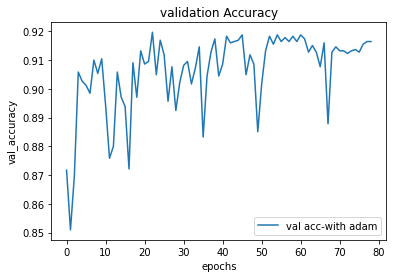

In [80]:
plt.figure(0)
plt.plot(history_adam.history['val_accuracy'], label='val acc-with adam')
plt.title('validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('val_accuracy')
plt.legend()

In [81]:
X_test,X_train,Y_test,Y_train = train_test_split(train,train_label,test_size = 0.3,random_state=0)

In [82]:

import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten,Dropout
import keras



#Build Model
height = 16
width = 16
channels = 1
num_classes = 36
epochs=79


model = keras.models.Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train,X_valid,Y_train,Y_valid = train_test_split(X_train,Y_train,test_size = 0.3,random_state=0)


history_adam2 = model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=16, epochs=epochs,verbose=1)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        640       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 1024)            

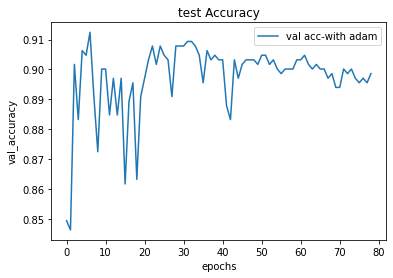

In [83]:
plt.figure(0)
plt.plot(history_adam2.history['val_accuracy'], label='val acc-with adam')
plt.title('test Accuracy')
plt.xlabel('epochs')
plt.ylabel('val_accuracy')
plt.legend()

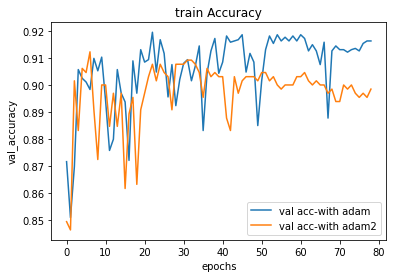

In [84]:
#plot adam & SGD
plt.figure(0)
plt.plot(history_adam.history['val_accuracy'], label='val acc-with adam')
plt.plot(history_adam2.history['val_accuracy'], label='val acc-with adam2')
plt.title('train Accuracy')
plt.xlabel('epochs')
plt.ylabel('val_accuracy')
plt.legend()

In [85]:
loss,acc = model.evaluate(X_test,Y_test)
print('loss = ',loss,'acc = ',acc)

158/158 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8890
loss =  0.3431868851184845 acc =  0.8890427350997925


In [86]:
test_pred=model.predict(X_test)

158/158 [==============================] - 0s 2ms/step


In [87]:
test_pred_label=[]
for i in range(0,len(test_pred)):
  test_pred_label.append(test_pred[i].argmax())


In [88]:
test_actual_label=[]
for i in range(0,len(test_pred)):
  test_actual_label.append(Y_test[i].argmax())

In [89]:
len(test_pred_label)

5056

In [90]:
len(test_actual_label)

5056

In [91]:
from sklearn import metrics
metrics.accuracy_score(test_pred_label,test_actual_label)

0.8890427215189873

In [92]:

test=sio.loadmat("/content/drive/MyDrive/HRCT/inflammation/4.mat")
a=test["totalDataSource"].reshape(test["totalDataSource"].shape[2],16,16)[0]
cv2_imshow(a)